In [17]:
!pip install nxviz
import pandas as pd
import networkx as nx
from networkx.drawing.layout import spring_layout
import re
import matplotlib.pyplot as plt
import nxviz as nv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 6.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/nxviz/__init__.py:33: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [3]:
receitas = pd.read_csv('ingredientes.csv')

In [4]:
print(receitas[0:10])

                     Nome da Receita  \
0                   Batida de murici   
1  Risotto de pequi com carne de sol   
2   Nordestina de cachaça com chichá   
3   Cocada cremosa de forno com caju   
4              Kyr royal de jenipapo   
5             Margarita de umbu-cajá   
6            Creme brûlée de mangaba   
7                 Charlote de bacuri   
8     Refrigerante de umbu com kefir   
9                     Paçoca de caju   

                                        Ingredientes  \
0  'Murici, polpa', 'Cachaça prata', 'Açúcar cris...   
1  'Fundo de pequi', 'Tomate', 'Cebola branca', '...   
2  'Chichá, torrado, picado', 'Cachaça', 'Licor d...   
3  'Margarina', 'Coco fresco, ralado', 'Leite con...   
4  'Licor de jenipapo', 'Espumante', 'Jenipapo, c...   
5  'Tequila branca', 'Sal', 'Umbu-cajá, polpa', '...   
6  'Gema', 'Açúcar refinado', 'Baunilha, fava', '...   
7  'Leite condensado', 'Bacuri, polpa', 'Chantill...   
8  'Umbu, polpa', 'Açúcar demerara', 'Água', 'Águ...   

In [7]:
ingredientes = []
for ings, tipos in zip(receitas['Ingredientes'], receitas['Tipos de Ingredientes']):
    rec_ingredientes = re.findall(r"'([^']*)'", ings)
    rec_tipos = re.findall(r"'([^']*)'", tipos)
    for ing, tipo in zip(rec_ingredientes, rec_tipos):
        if [ing, tipo] not in ingredientes:
            ingredientes.append([ing, tipo])


In [8]:
grafo_ingredientes = nx.Graph()
for ing, tipo in ingredientes:
    grafo_ingredientes.add_node(ing, tipo=tipo)

In [9]:
for rec in receitas['Ingredientes']:
    rec_ingredientes = re.findall(r"'([^']*)'", rec)
    for ing1, ing2 in zip(rec_ingredientes, rec_ingredientes[1:]):
        grafo_ingredientes.add_edge(ing1, ing2)

In [14]:
nx.attribute_assortativity_coefficient(grafo_ingredientes, 'tipo')

0.09346618764409483

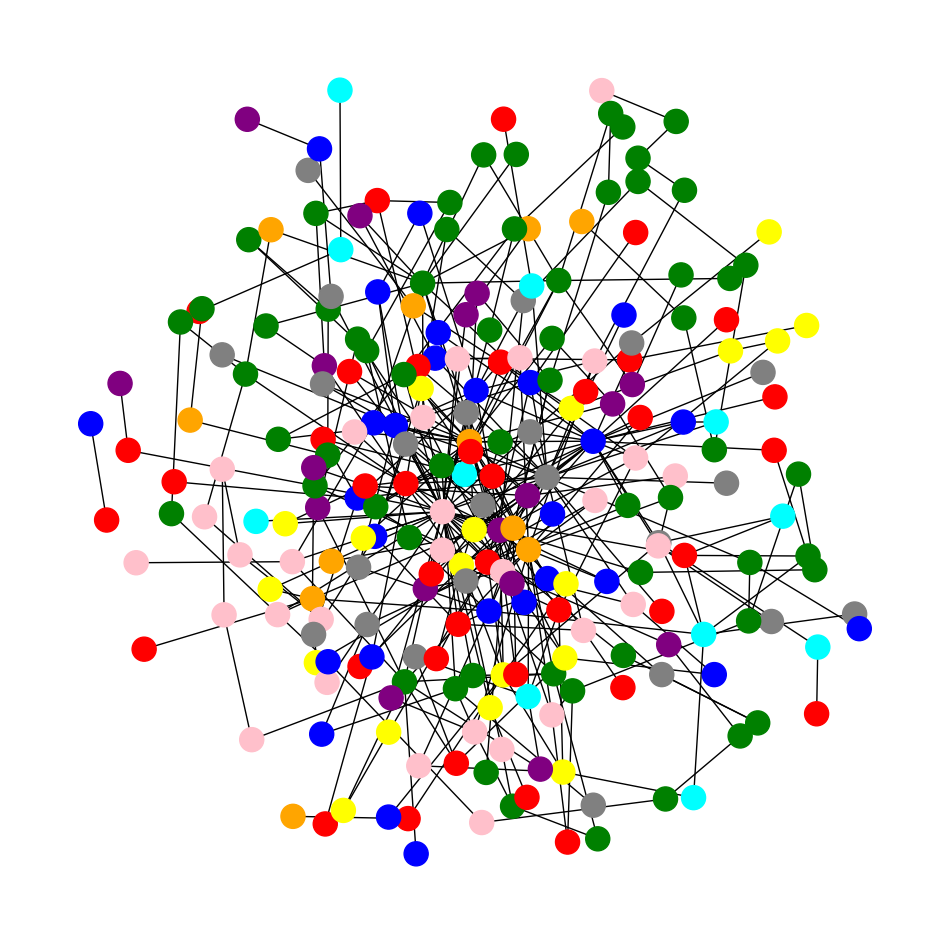

In [13]:
cores_tipos = {
    'vegetal': 'green',
    'fruta': 'red',
    'laticínio': 'yellow',
    'condimento': 'pink',
    'proteína': 'purple',
    'carboidrato': 'blue',
    'gordura': 'orange',
    'bebida': 'cyan',
    'outro': 'grey'
}
cores_nos = [cores_tipos.get(grafo_ingredientes.nodes[no]['tipo'], 'gray') for no in grafo_ingredientes.nodes]

# Visualização do grafo
pos = spring_layout(grafo_ingredientes, k=0.3)  # Layout para impedir sobreposição de vértices
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw(grafo_ingredientes,
        pos=pos,
        node_color=cores_nos,
        with_labels=False,
        ax=ax
        )
plt.show()

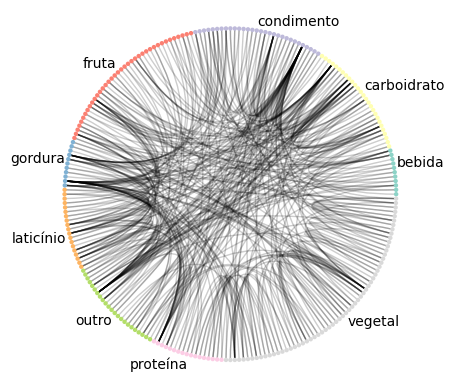

In [18]:
import matplotlib.pyplot as plt
from nxviz import annotate, highlights

ax = nv.circos(grafo_ingredientes,
               group_by='tipo',
               node_color_by='tipo'
)
annotate.circos_group(grafo_ingredientes, group_by='tipo')

# Save figure
plt.savefig("assortativity.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()